In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

sns.set_context("talk")

In [2]:
df = pd.read_csv("../outputs/mutational_model_stats.tsv", sep="\t")
df.head()

,tri,ref,alt,variant_type,lvl,mu,obs,pos
0,AAA,A,C,transversion,0,1.800000e-09,0.046519,27021
1,AAA,A,G,non-CpG transition,0,3.010000e-09,0.098643,204496
2,AAA,A,T,transversion,0,1.040000e-09,0.026177,42557
3,AAC,A,C,transversion,0,1.420000e-09,0.032891,14989
4,AAC,A,G,non-CpG transition,0,5.260000e-09,0.161916,128536


In [3]:
df["log_obs"] = np.log(1-df["obs"])
df["log_pos"] = np.log10(df["pos"])

/opt/conda/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
dfa = df[df["obs"] < 1]

In [5]:
fit = np.polyfit(dfa["mu"], np.log(1-dfa["obs"]), 1, w=dfa["pos"])
p = np.poly1d(fit)
x = np.linspace(dfa["mu"].min(), dfa["mu"].max())
y = p(x)

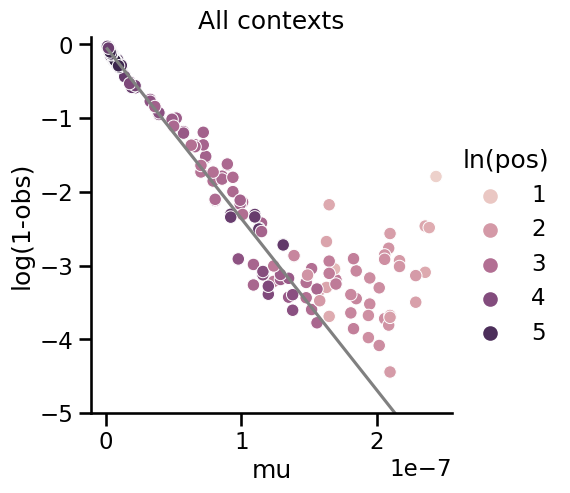

In [6]:
g = sns.relplot(kind="scatter",
            data=dfa,
            x="mu",
            y="log_obs",
            hue="log_pos"
           )

g.set(title="All contexts",
      xlabel="mu",
      ylabel="log(1-obs)",
      ylim=(-5, 0.1)
     )

g._legend.set_title("ln(pos)")

plt.plot(x, y, color="grey")

In [7]:
model = smf.wls("np.log(1 - obs) ~ mu", data=dfa, weights=dfa["pos"]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(1 - obs)   R-squared:                       0.979
Model:                            WLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.69e-251
Time:                        16:01:02   Log-Likelihood:                 212.64
No. Observations:                 299   AIC:                            -421.3
Df Residuals:                     297   BIC:                            -413.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0384      0.003    -11.732      0.000      -0.045      -0.032
mu         -2.256e+07   1.91e+05   -117.940      0.000   -2.29e+07   -2.22e+07
==============================================================================
Omnibus:                       81.470   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.263
Skew:                          -1.077   Prob(JB):                     2.89e-75
Kurtosis:                       7.787   Cond. No.                     6.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
dfa = df[df["pos"] > 1000]

In [9]:
fit = np.polyfit(dfa["mu"], np.log(1-dfa["obs"]), 1, w=dfa["pos"])
p = np.poly1d(fit)
x = np.linspace(dfa["mu"].min(), dfa["mu"].max())
y = p(x)

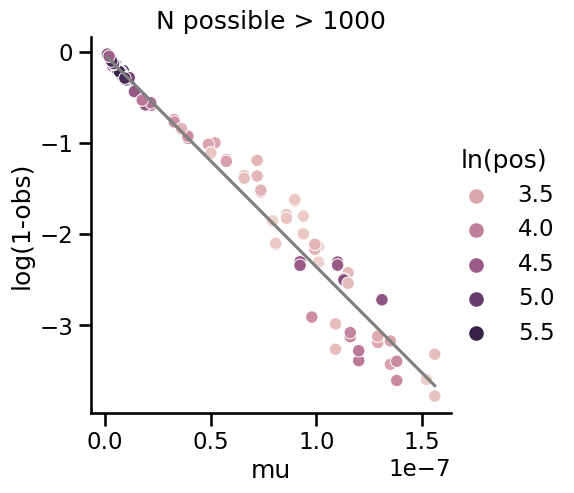

In [10]:
g = sns.relplot(kind="scatter",
            data=dfa,
            x="mu",
            y="log_obs",
            hue="log_pos"
           )

g.set(title='N possible > 1000',
      xlabel="mu",
      ylabel="log(1-obs)",
     )

g._legend.set_title("ln(pos)")

plt.plot(x, y, color="grey")

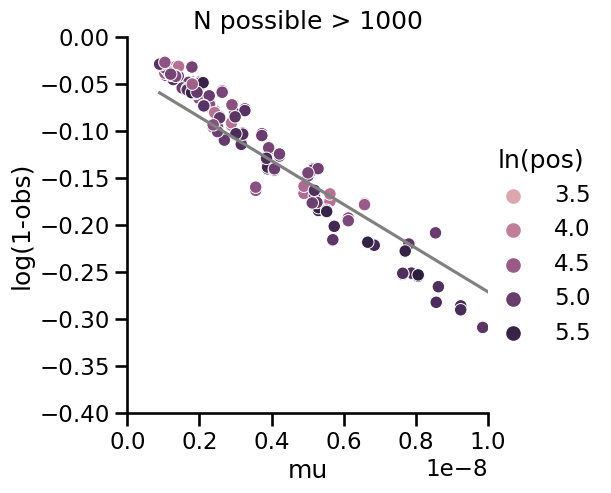

In [11]:
g = sns.relplot(kind="scatter",
            data=dfa,
            x="mu",
            y="log_obs",
            hue="log_pos"
           )

g.set(title='N possible > 1000',
      xlabel="mu",
      ylabel="log(1-obs)",
      xlim=(0,1*10**-8),
      ylim=(-0.4,0)
     )

g._legend.set_title("ln(pos)")

plt.plot(x, y, color="grey")

In [12]:
model = smf.wls("np.log(1 - obs) ~ mu", data=dfa, weights=dfa["pos"]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(1 - obs)   R-squared:                       0.981
Model:                            WLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.275e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.44e-211
Time:                        16:01:03   Log-Likelihood:                 290.72
No. Observations:                 244   AIC:                            -577.4
Df Residuals:                     242   BIC:                            -570.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0371      0.003    -11.039      0.000      -0.044      -0.031
mu         -2.279e+07   2.02e+05   -112.931      0.000   -2.32e+07   -2.24e+07
==============================================================================
Omnibus:                       46.423   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.172
Skew:                          -0.577   Prob(JB):                     1.06e-55
Kurtosis:                       7.855   Cond. No.                     6.54e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/conda/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


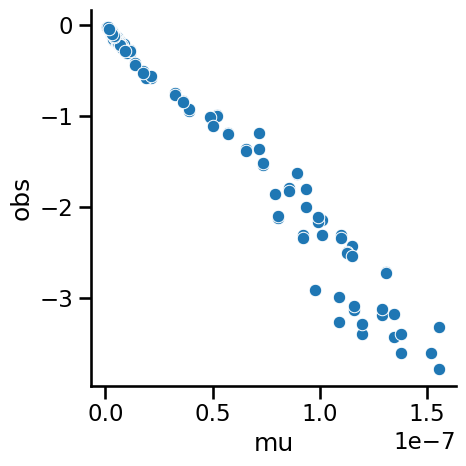

In [21]:
sns.relplot(kind="scatter",
           data=dfa,
           x="mu",
           y=np.log(1-df["obs"])
          )